In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib as mpl
from sklearn.linear_model import Ridge
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import scipy.spatial.distance as spd
import ResidualDecomposition as RD

np.random.seed(0)

In [37]:
data = pd.read_csv("Datasets/P_BostonHousing.csv") 
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [38]:
lr = Ridge()
lr.fit(X, Y)

t1 = time.time()

rcomposition_model = RD.ResidualDecompositionSymmetric()
rcomposition_model.fit(X, Y, lr, 500)
rcomposition = rcomposition_model.get_composition()
rcontribution = rcomposition_model.get_contribution()

t2 = time.time()

0
50
100
150
200
250
300
350
400
450


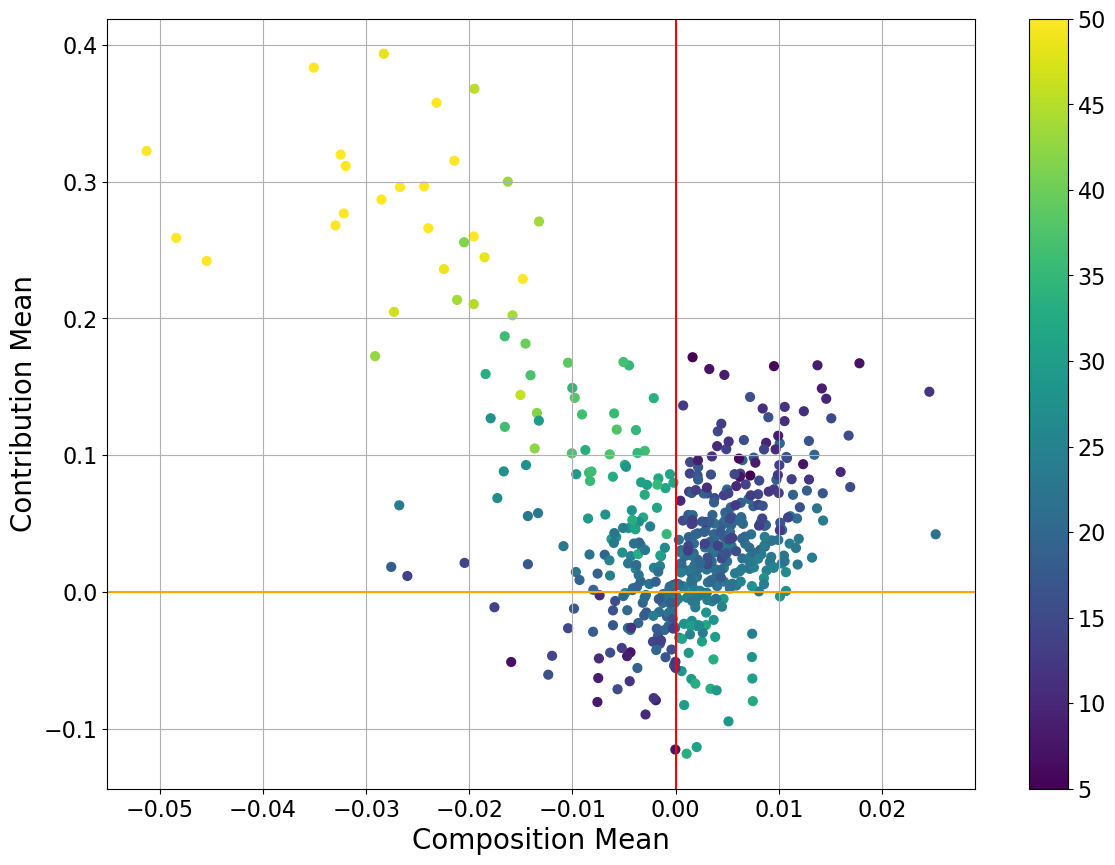

In [39]:
plt.figure(figsize=(14,10))

plt.scatter(np.mean(rcomposition, axis=0), np.mean(rcontribution, axis=1), c=Y, s=40)

plt.grid(True)

plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)

plt.savefig("Figures/boston_rcomposition_lr_1000.pdf", bbox_inches='tight')

In [26]:
lr = Ridge()
lr.fit(X, Y)
res = lr.predict(X) - Y

(-30.0, 18.0)

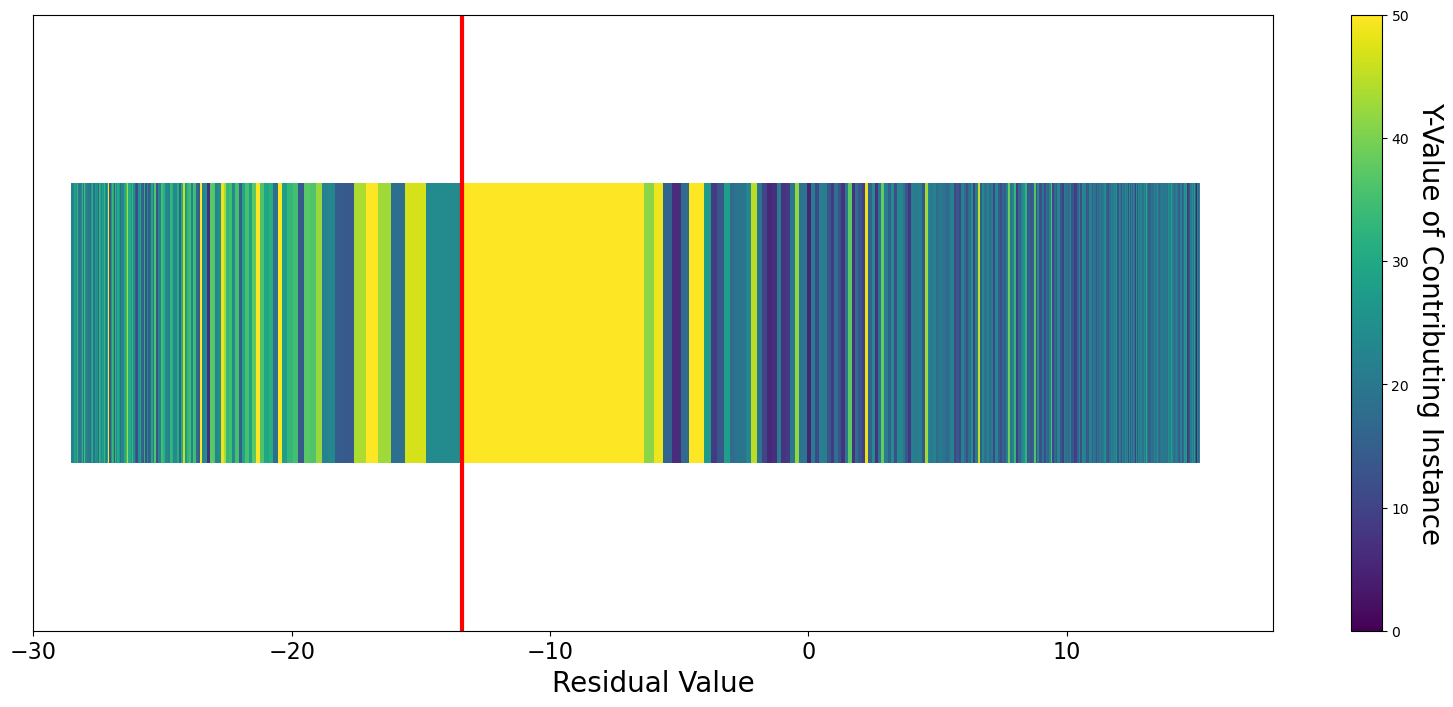

In [27]:
cmap = mpl.cm.get_cmap("viridis")

plt.figure(figsize=(20, 8))

i_instance = 214

i_residual = res[i_instance]

composition_values = rcomposition[:,i_instance]
composition_orders = np.argsort(composition_values)
composition_ordered = composition_values[composition_orders]
Y_ordered = Y[composition_orders]

less_zero = np.where(composition_ordered < 0)[0]
more_zero = np.where(composition_ordered > 0)[0]  
current_Y = np.sum(composition_ordered[less_zero])

for i in range(0, more_zero.shape[0]):
    current_index = more_zero[i]
    current_height = np.abs(composition_ordered[current_index])
    Y_color = cmap(Y_ordered[current_index] / 50)
    plt.barh(0, current_height, 0.1, current_Y, color=Y_color)
    current_Y += current_height
    
plt.axvline(current_Y, c='r', linewidth=3)

for i in range(0, less_zero.shape[0]):
    current_index = less_zero[i]
    current_height = np.abs(composition_ordered[current_index])
    Y_color = cmap(Y_ordered[current_index] / 50)
    plt.barh(0, current_height, 0.1, current_Y, color=Y_color)
    current_Y += current_height
    
plt.xlabel("Residual Value", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks([])

from matplotlib.cm import ScalarMappable
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(0,50))
sm.set_array([])

plt.barh(0,0, 0.2)

cbar = plt.colorbar(sm)
cbar.set_label('Y-Value of Contributing Instance', rotation=270, labelpad=25, fontsize=20)
plt.xlim(-30, 18)

(-45.0, 18.0)

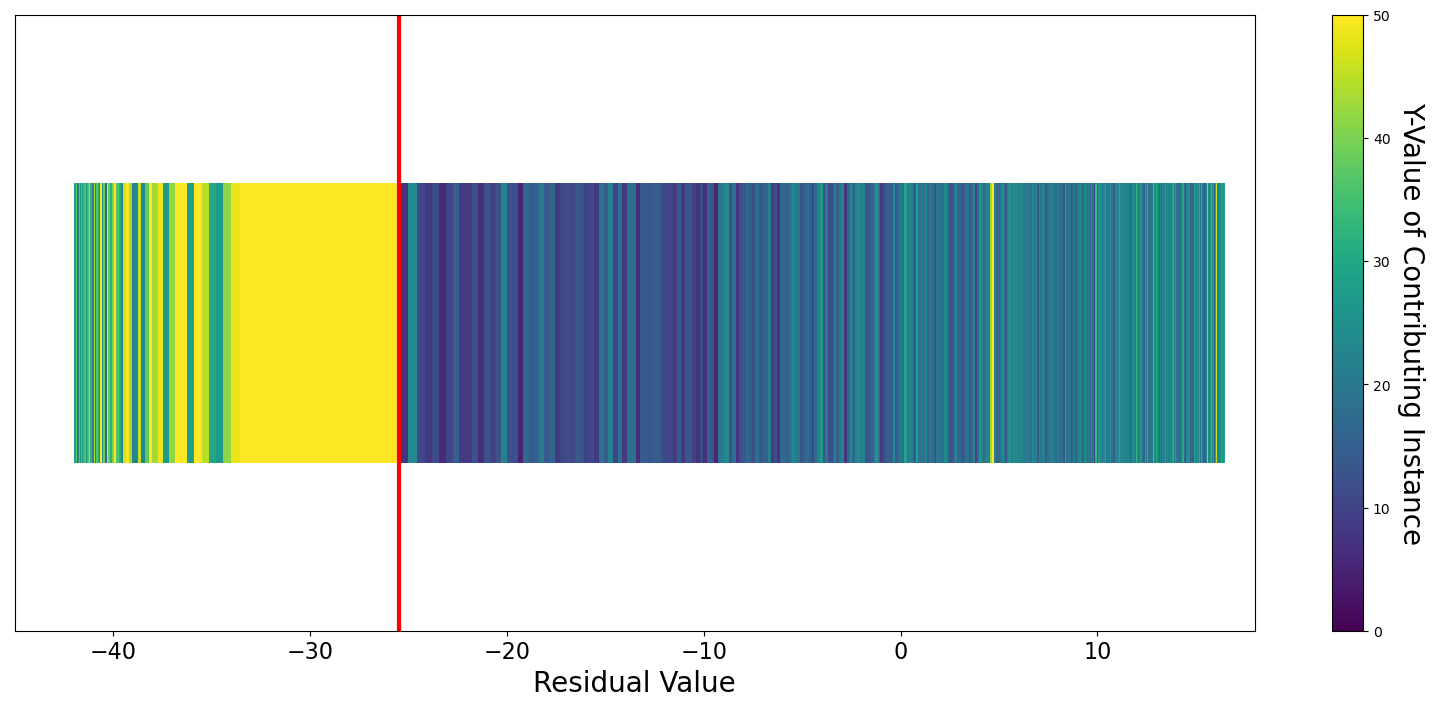

In [28]:
cmap = mpl.cm.get_cmap("viridis")

plt.figure(figsize=(20, 8))

i_instance = 371

i_residual = res[i_instance]

composition_values = rcomposition[:,i_instance]
composition_orders = np.argsort(composition_values)
composition_ordered = composition_values[composition_orders]
Y_ordered = Y[composition_orders]

less_zero = np.where(composition_ordered < 0)[0]
more_zero = np.where(composition_ordered > 0)[0]  
current_Y = np.sum(composition_ordered[less_zero])

for i in range(0, more_zero.shape[0]):
    current_index = more_zero[i]
    current_height = np.abs(composition_ordered[current_index])
    Y_color = cmap(Y_ordered[current_index] / 50)
    plt.barh(0, current_height, 0.1, current_Y, color=Y_color)
    current_Y += current_height
    
plt.axvline(current_Y, c='r', linewidth=3)

for i in range(0, less_zero.shape[0]):
    current_index = less_zero[i]
    current_height = np.abs(composition_ordered[current_index])
    Y_color = cmap(Y_ordered[current_index] / 50)
    plt.barh(0, current_height, 0.1, current_Y, color=Y_color)
    current_Y += current_height
    
plt.xlabel("Residual Value", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks([])

from matplotlib.cm import ScalarMappable
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(0,50))
sm.set_array([])

plt.barh(0,0, 0.2)

cbar = plt.colorbar(sm)
cbar.set_label('Y-Value of Contributing Instance', rotation=270, labelpad=25, fontsize=20)
plt.xlim(-45, 18)

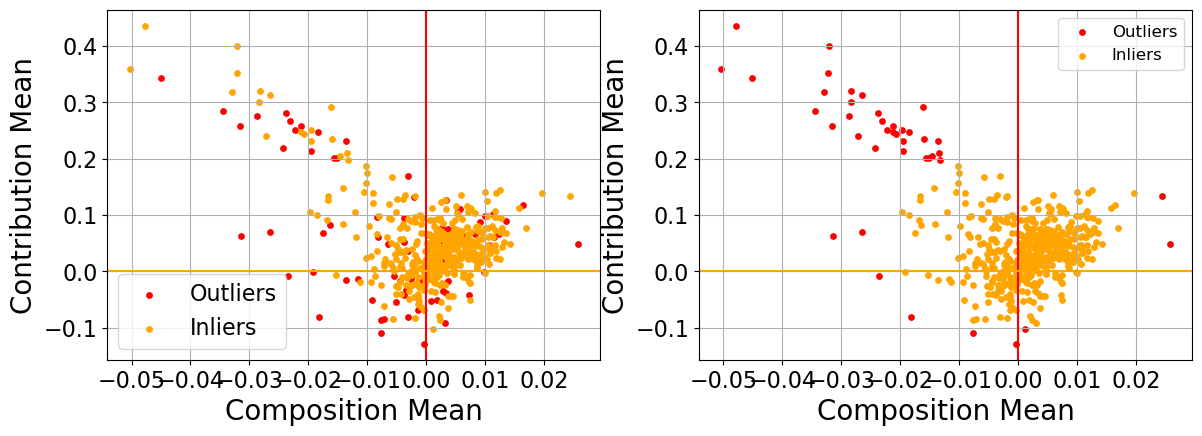

In [29]:
plt.figure(figsize=(14,10))

plt.subplot(221)
iso_forest = IsolationForest(n_estimators=1000)
iso_forest.fit(X)

iso_predicted = iso_forest.predict(X)

iso_int = np.where(iso_predicted == -1)
iso_out = np.where(iso_predicted == 1)

iso_int = np.where(iso_predicted == -1)
iso_out = np.where(iso_predicted == 1)

plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.scatter(np.mean(rcomposition, axis=0)[iso_int], np.mean(rcontribution, axis=1)[iso_int], c='r', s=15, label='Outliers')
plt.scatter(np.mean(rcomposition, axis=0)[iso_out], np.mean(rcontribution, axis=1)[iso_out], c='orange', s=15, label='Inliers')
plt.legend(fontsize=16)

plt.grid(True)


plt.subplot(222)
iso_forest = IsolationForest(n_estimators=1000)
iso_forest.fit(rcontribution)

iso_predicted = iso_forest.predict(rcontribution)

iso_int = np.where(iso_predicted == -1)
iso_out = np.where(iso_predicted == 1)

iso_int = np.where(iso_predicted == -1)
iso_out = np.where(iso_predicted == 1)

plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.scatter(np.mean(rcomposition, axis=0)[iso_int], np.mean(rcontribution, axis=1)[iso_int], c='r', s=15, label='Outliers')
plt.scatter(np.mean(rcomposition, axis=0)[iso_out], np.mean(rcontribution, axis=1)[iso_out], c='orange', s=15, label='Inliers')
plt.legend(fontsize=12)

plt.grid(True)

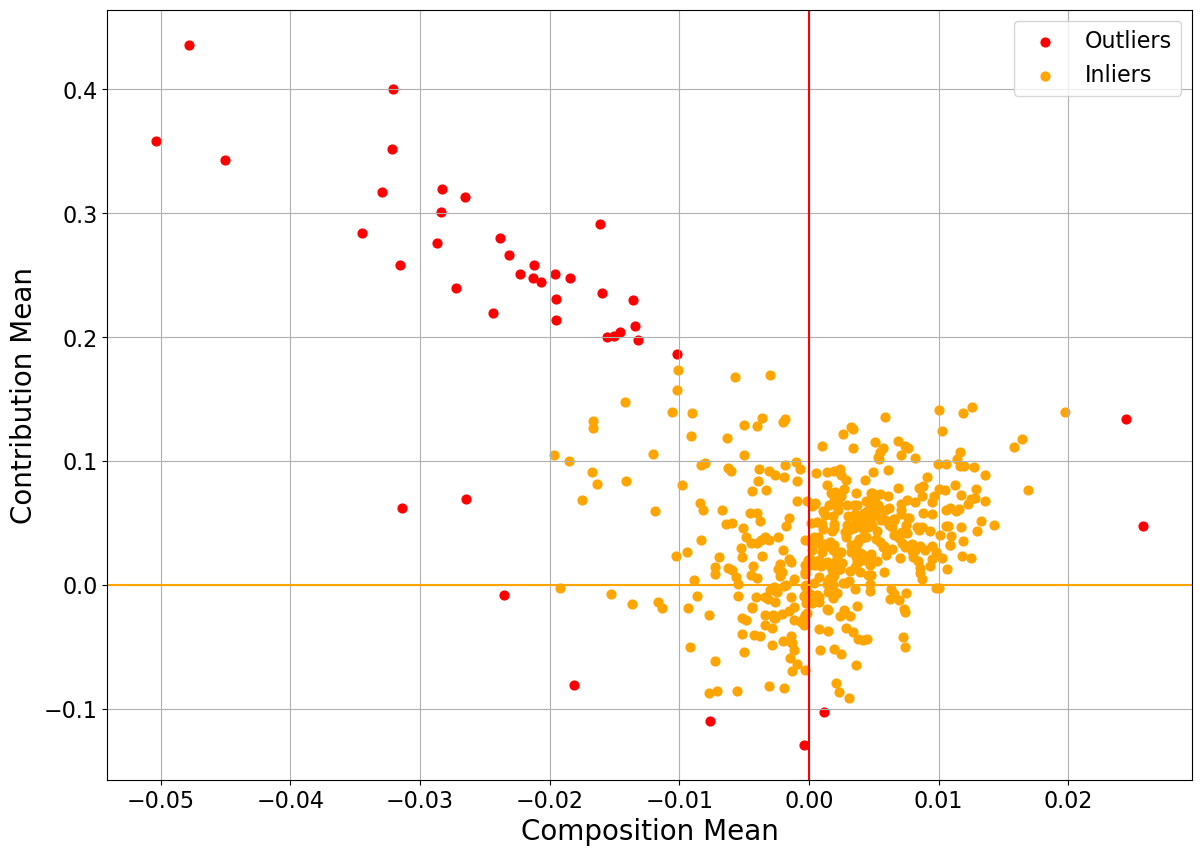

In [30]:
iso_forest = IsolationForest(n_estimators=1000)
iso_forest.fit(rcontribution)

iso_predicted = iso_forest.predict(rcontribution)

iso_int = np.where(iso_predicted == -1)
iso_out = np.where(iso_predicted == 1)

plt.figure(figsize=(14,10))

plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.scatter(np.mean(rcomposition, axis=0)[iso_int], np.mean(rcontribution, axis=1)[iso_int], c='r', s=40, label='Outliers')
plt.scatter(np.mean(rcomposition, axis=0)[iso_out], np.mean(rcontribution, axis=1)[iso_out], c='orange', s=40, label='Inliers')
plt.legend(fontsize=16)

plt.grid(True)

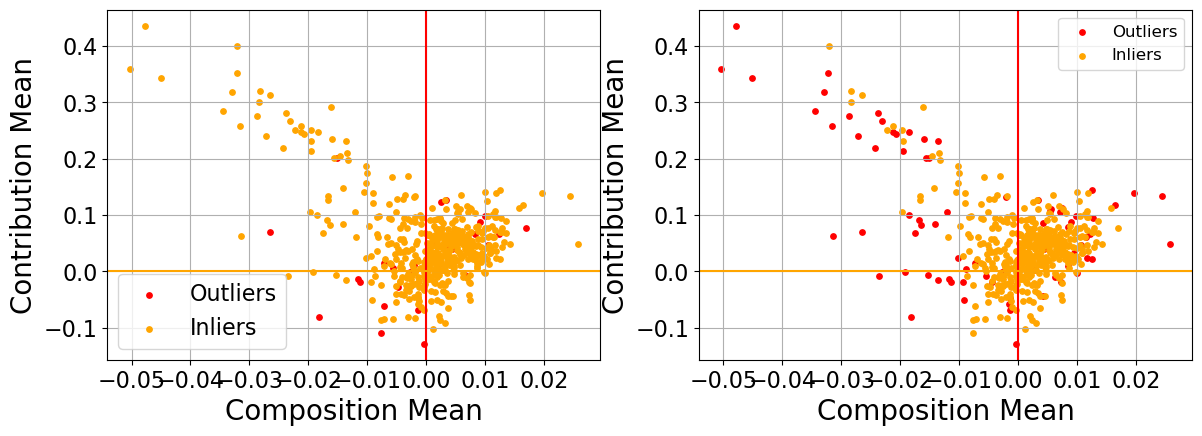

In [31]:
plt.figure(figsize=(14,10))

plt.subplot(221)
iso_forest = LocalOutlierFactor(n_neighbors=9)

iso_predicted = iso_forest.fit_predict(X)

iso_int = np.where(iso_predicted == -1)
iso_out = np.where(iso_predicted == 1)

plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.scatter(np.mean(rcomposition, axis=0)[iso_int], np.mean(rcontribution, axis=1)[iso_int], c='r', s=15, label='Outliers')
plt.scatter(np.mean(rcomposition, axis=0)[iso_out], np.mean(rcontribution, axis=1)[iso_out], c='orange', s=15, label='Inliers')
plt.legend(fontsize=16)

plt.grid(True)


plt.subplot(222)
iso_forest = LocalOutlierFactor(n_neighbors=9)

iso_predicted = iso_forest.fit_predict(rcontribution)

iso_int = np.where(iso_predicted == -1)
iso_out = np.where(iso_predicted == 1)

plt.xlabel("Composition Mean", fontsize=20)
plt.ylabel("Contribution Mean", fontsize=20)
plt.axvline(0, c='red')
plt.axhline(0, c='orange')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.scatter(np.mean(rcomposition, axis=0)[iso_int], np.mean(rcontribution, axis=1)[iso_int], c='r', s=15, label='Outliers')
plt.scatter(np.mean(rcomposition, axis=0)[iso_out], np.mean(rcontribution, axis=1)[iso_out], c='orange', s=15, label='Inliers')
plt.legend(fontsize=12)

plt.grid(True)